In [1]:
'''
EDA and Feature Engineering on Google Play Store Dataset
1. Proplem Statement:
    - Today, 1.85 million apps are available for users to download. Android users have even more
    from which to choose, with 2.56 million available on the Google Play Store.
    Our goal is to find the most popular category, finf the app with most installs, and 
    app with largest size.
2. Data Dictionary:

The data consists of 13 columns and 10841 rows. The columns are as follows:
    - App: Name of the app
    - Category: Category of the app
    - Rating: Rating of the app
    - Reviews: Number of reviews
    - Size: Size of the app
    - Installs: Number of installs
    - Type: Type of app (Free or Paid)
    - Price: Price of the app
    - Content Rating: Content rating of the app
    - Genres: Genre of the app
    - Last Updated: Date of last update
    - Current Ver: Current version of the app
    - Android Ver: Minimum Android version required
'''

'\nEDA and Feature Engineering on Google Play Store Dataset\n1. Proplem Statement:\n    - Today, 1.85 million apps are available for users to download. Android users have even more\n    from which to choose, with 2.56 million available on the Google Play Store.\n    Our goal is to find the most popular category, finf the app with most installs, and \n    app with largest size.\n2. Data Dictionary:\n\nThe data consists of 13 columns and 10841 rows. The columns are as follows:\n    - App: Name of the app\n    - Category: Category of the app\n    - Rating: Rating of the app\n    - Reviews: Number of reviews\n    - Size: Size of the app\n    - Installs: Number of installs\n    - Type: Type of app (Free or Paid)\n    - Price: Price of the app\n    - Content Rating: Content rating of the app\n    - Genres: Genre of the app\n    - Last Updated: Date of last update\n    - Current Ver: Current version of the app\n    - Android Ver: Minimum Android version required\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/abhik12295/playstore-Dataset/refs/heads/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Check for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Insights and observations:
# 1. The dataset contains 13 columns and 10841 rows.
# 2. The dataset contains missing values in the following columns:
#    - Rating: 1474 missing values
#    - Type: 1 missing value
#    - Content Rating: 1 missing value
#   - Current Ver: 8 missing values
#   - Android Ver: 3 missing value



Data Cleaning

In [8]:
df['Reviews'].str.isnumeric().sum()
# we have 10841 rows and 10840 reviews are numeric
# 1 record is not numeric

np.int64(10840)

In [9]:
# looking for the record which is not numeric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy = df.copy()

In [11]:
# we will drop the record which is not numeric, since there is only 1 record
# and it is not important for our analysis
df_copy.drop(index=10472, inplace=True)


In [12]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [13]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
# Convert the Reviews column to datatype int
df_copy['Reviews'] = df_copy['Reviews'].astype(int)
df_copy['Reviews'].dtype

dtype('int64')

In [15]:
# Check for Size columns 
df_copy['Size'].dtype

dtype('O')

In [16]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
# Will convert the Size column to numeric
# M to k
df_copy['Size'] = df_copy['Size'].str.replace('M', '000', regex=False)
df_copy['Size'] = df_copy['Size'].str.replace('k', '', regex=False)
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan, regex=False)
df_copy['Size'].unique()


array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [18]:
# check for installs
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
# so in install we have + and we need to remove it and convert to int
import re


df_copy['Installs'] = df_copy['Installs'].str.replace('+', '', regex=False)
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '', regex=False)
df_copy['Installs'] = df_copy['Installs'].str.replace(' ','',regex=False)
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [20]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
chars_to_remove = ['$',' ','+']
columns_to_clean = ['Price','Size','Installs']
for col in columns_to_clean:
    for char in chars_to_remove:
        df_copy[col] = df_copy[col].str.replace(char, '', regex=False)
df_copy['Price'].unique()


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [22]:
df_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [23]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy['Price'] = df_copy['Price'].astype(float)

In [24]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [25]:
# now look last update colmn
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [26]:
# convert the Last Updated column to datetime
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']


0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [27]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [28]:
df_copy.drop(columns=['Last Updated'], inplace=True)

In [29]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [30]:
# save the cleaned data to a new csv file
df_copy.to_csv('google_playstore_cleaned.csv', index=False)

In [31]:
# EDA and Feature Engineering
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [32]:
# duplicate values
df_copy.duplicated('App').sum() 

np.int64(1181)

Observation:
    - dataset has duplicate records

In [33]:
df_copy= df_copy.drop_duplicates(subset=['App'], keep='first')
df_copy.duplicated('App').sum()

np.int64(0)

Explore Data:

In [34]:
numeric_features = [col for col in df_copy.columns if df_copy[col].dtype!='O']
categorical_feature = [col for col in df_copy.columns if df_copy[col].dtype=='O']

# print columns
print(f'{len(numeric_features)} numeric features     -> {numeric_features}')
print(f'{len(categorical_feature)} categorical features -> {categorical_feature}')

8 numeric features     -> ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
7 categorical features -> ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [35]:
# proportion of count data on categorical features
for col in categorical_feature:
    print(f'{col} -> {df_copy[col].value_counts(normalize=True)*100}')
    print('----------------------------------')
    print()

App -> App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Pink Silver Bow Keyboard Theme                        0.010353
Art Drawing Ideas                                     0.010353
Anime Manga Coloring Book                             0.010353
Easy Origami Ideas                                    0.010353
I Creative Idea                                       0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------

Category -> Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.8

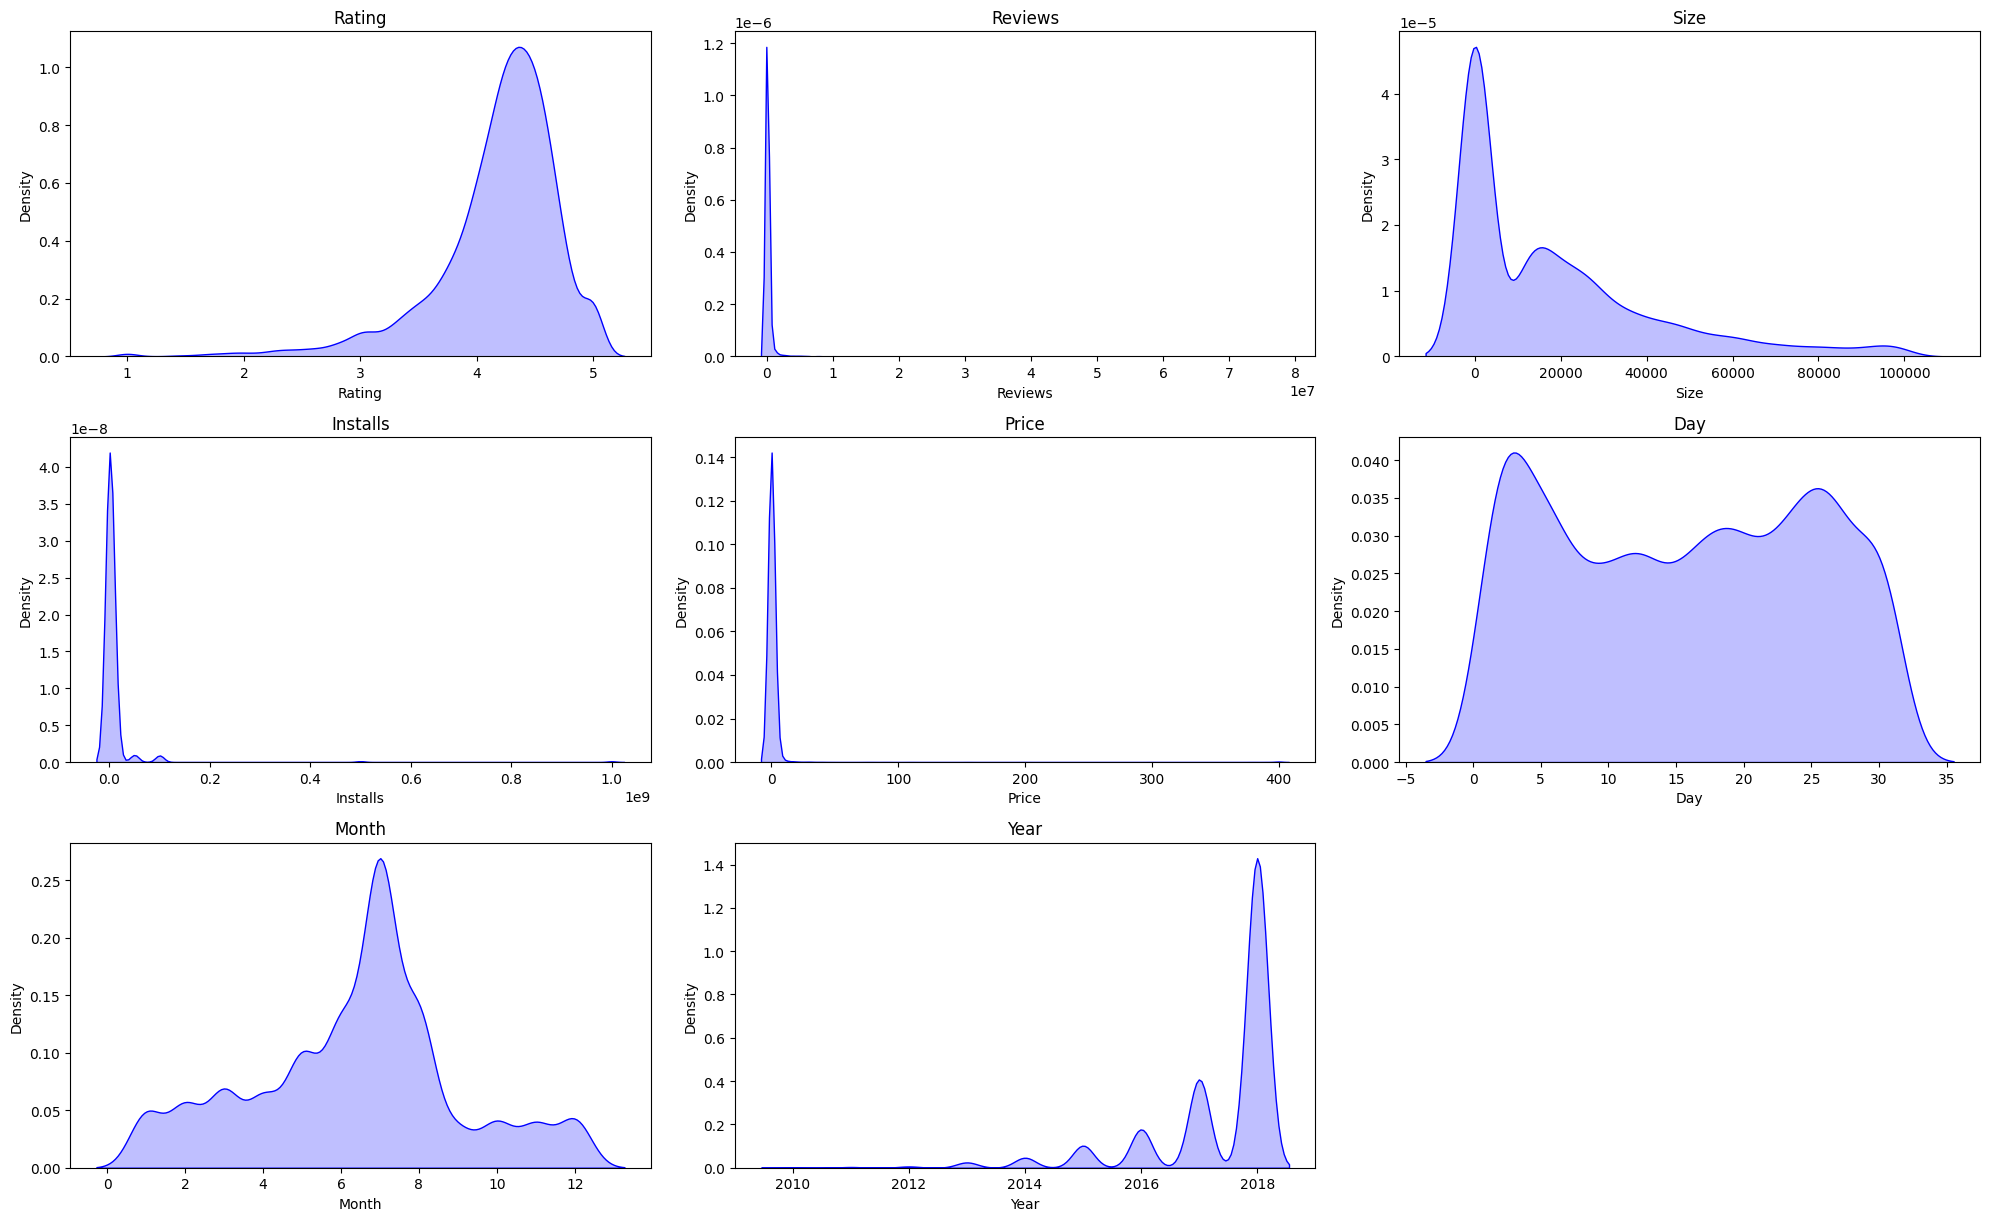

In [36]:
# kde plot - univariate analysis
plt.figure(figsize=(20, 20))
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(df_copy[numeric_features[i]], color='blue', fill=True)
    plt.title(numeric_features[i])
    plt.xlabel(numeric_features[i])
    plt.ylabel('Density')
    plt.tight_layout()

In [37]:
'''
Observation:
Rating:
    - The rating is normally distributed with a mean of 4.2 and a standard deviation of 0.5.
    - The rating is skewed to the right, with a few apps having a rating of 5.
Year:
    - The year is normally distributed with a mean of 2018 and a standard deviation of 1.5.
    - The year is skewed to the right, with a few apps having a year of 2020.
Reviews, Size, Installs, Price:
    - The reviews, size, installs, and price are normally distributed with a mean of 4.2 and a standard deviation of 0.5.
    - The reviews, size, installs, and price are skewed to the right, with a few apps having a rating of 5.
'''

'\nObservation:\nRating:\n    - The rating is normally distributed with a mean of 4.2 and a standard deviation of 0.5.\n    - The rating is skewed to the right, with a few apps having a rating of 5.\nYear:\n    - The year is normally distributed with a mean of 2018 and a standard deviation of 1.5.\n    - The year is skewed to the right, with a few apps having a year of 2020.\nReviews, Size, Installs, Price:\n    - The reviews, size, installs, and price are normally distributed with a mean of 4.2 and a standard deviation of 0.5.\n    - The reviews, size, installs, and price are skewed to the right, with a few apps having a rating of 5.\n'

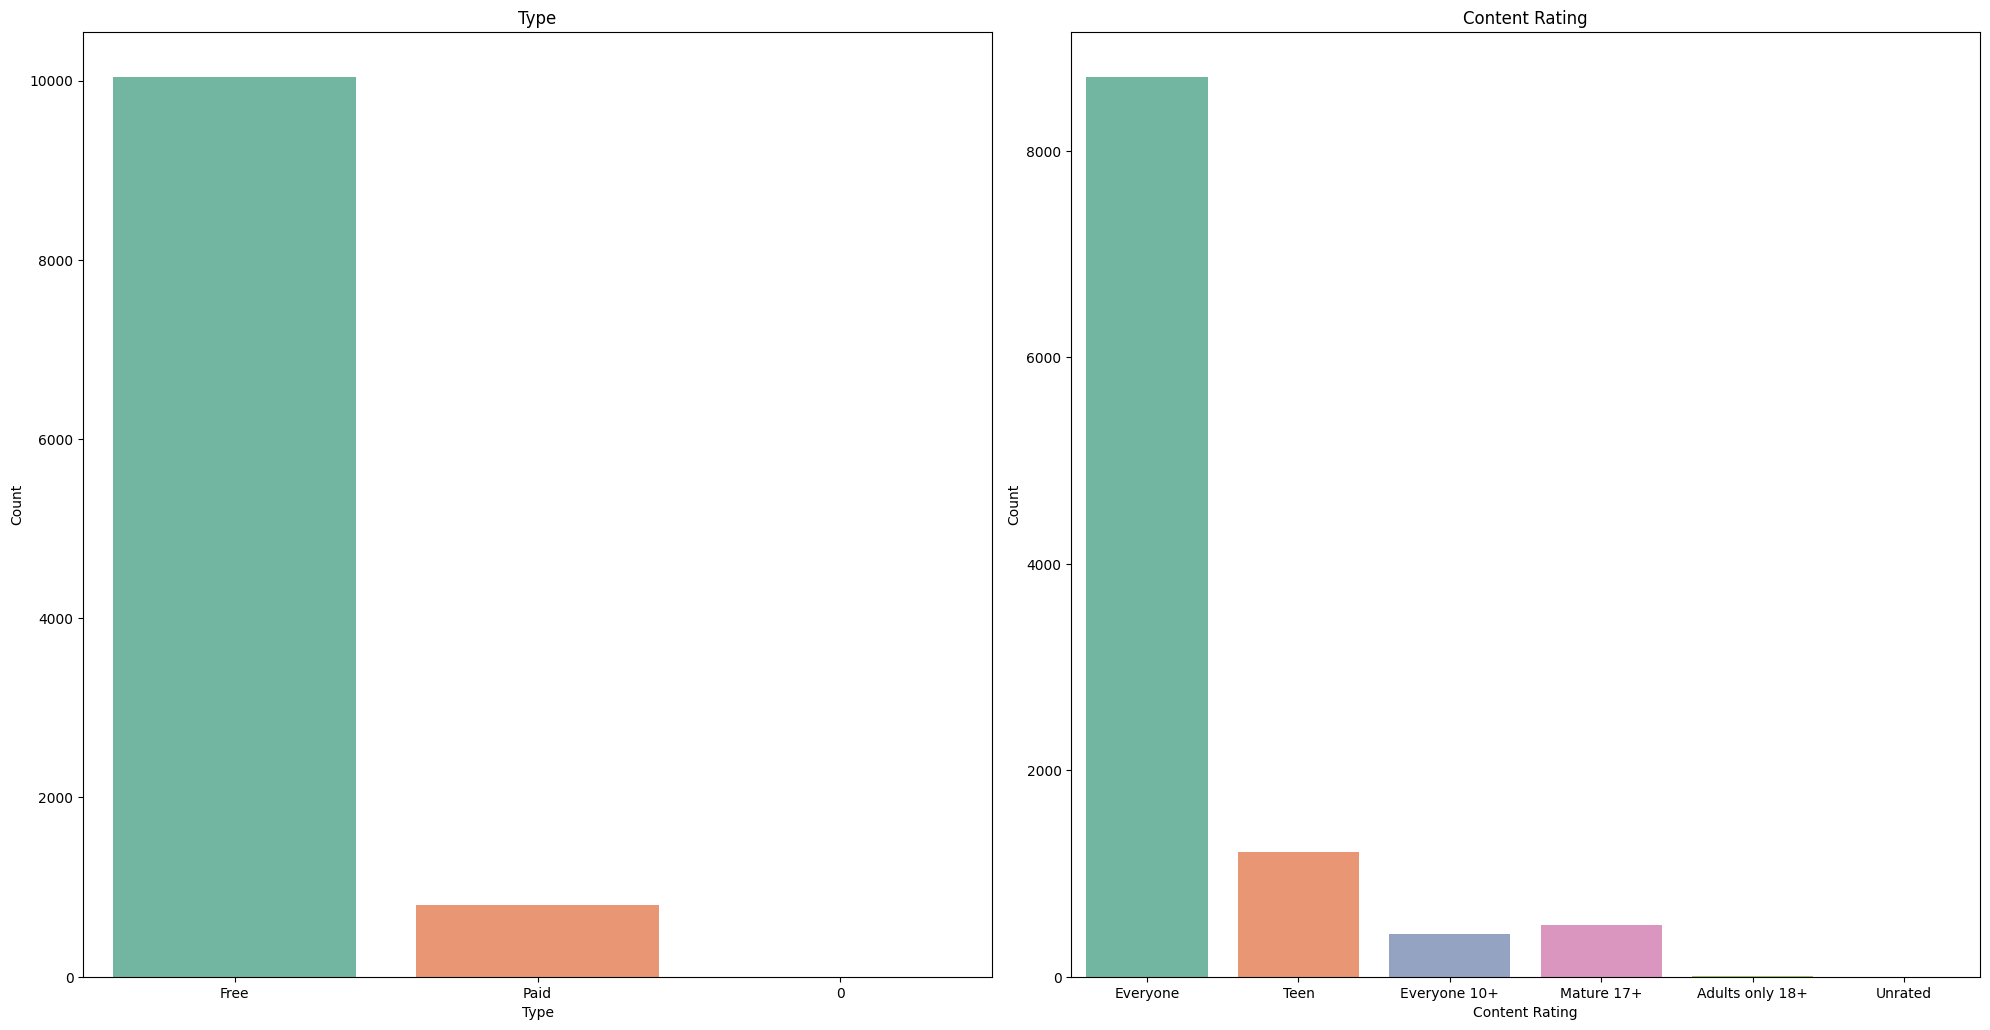

In [38]:
# Univariate analysis of Categorical features
plt.figure(figsize=(20, 20))
category = ['Type','Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette='Set2' )
    plt.title(category[i])
    plt.xlabel(category[i])
    plt.ylabel('Count')
    plt.tight_layout()

Text(0.5, 1.0, 'Most Popular Category')

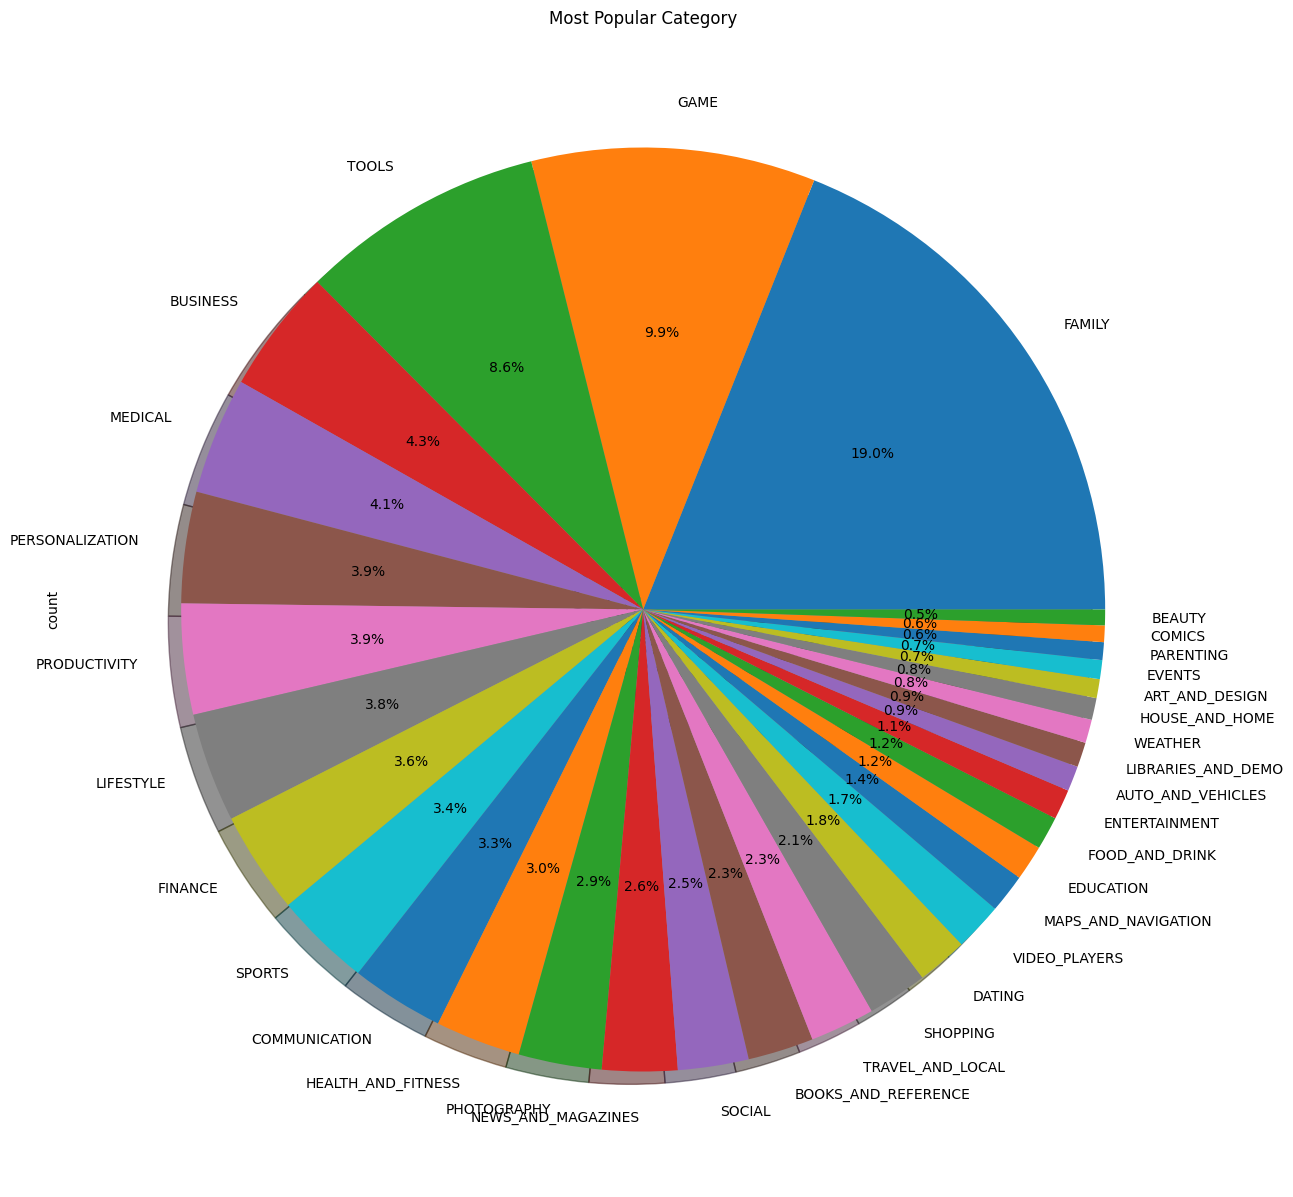

In [39]:
# Which is the most popular category?
df_copy['Category'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(15, 15))
plt.title('Most Popular Category')


In [40]:
'''
Observation:
- The most popular category is Family with 18.5% of the total apps.
- The second most popular category is Game with 14.5% of the total apps.
- The third most popular category is Tools with 10.5% of the total apps.
- Beats, Music & Audio, and Entertainment are the least popular categories with 2.5% of the total apps.
'''

'\nObservation:\n- The most popular category is Family with 18.5% of the total apps.\n- The second most popular category is Game with 14.5% of the total apps.\n- The third most popular category is Tools with 10.5% of the total apps.\n- Beats, Music & Audio, and Entertainment are the least popular categories with 2.5% of the total apps.\n'

In [41]:
# Top 10 app categories
category = pd.DataFrame(df_copy['Category'].value_counts().head(10))
category.reset_index(inplace=True)
category.columns = ['Category', 'Count']


In [42]:
category

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


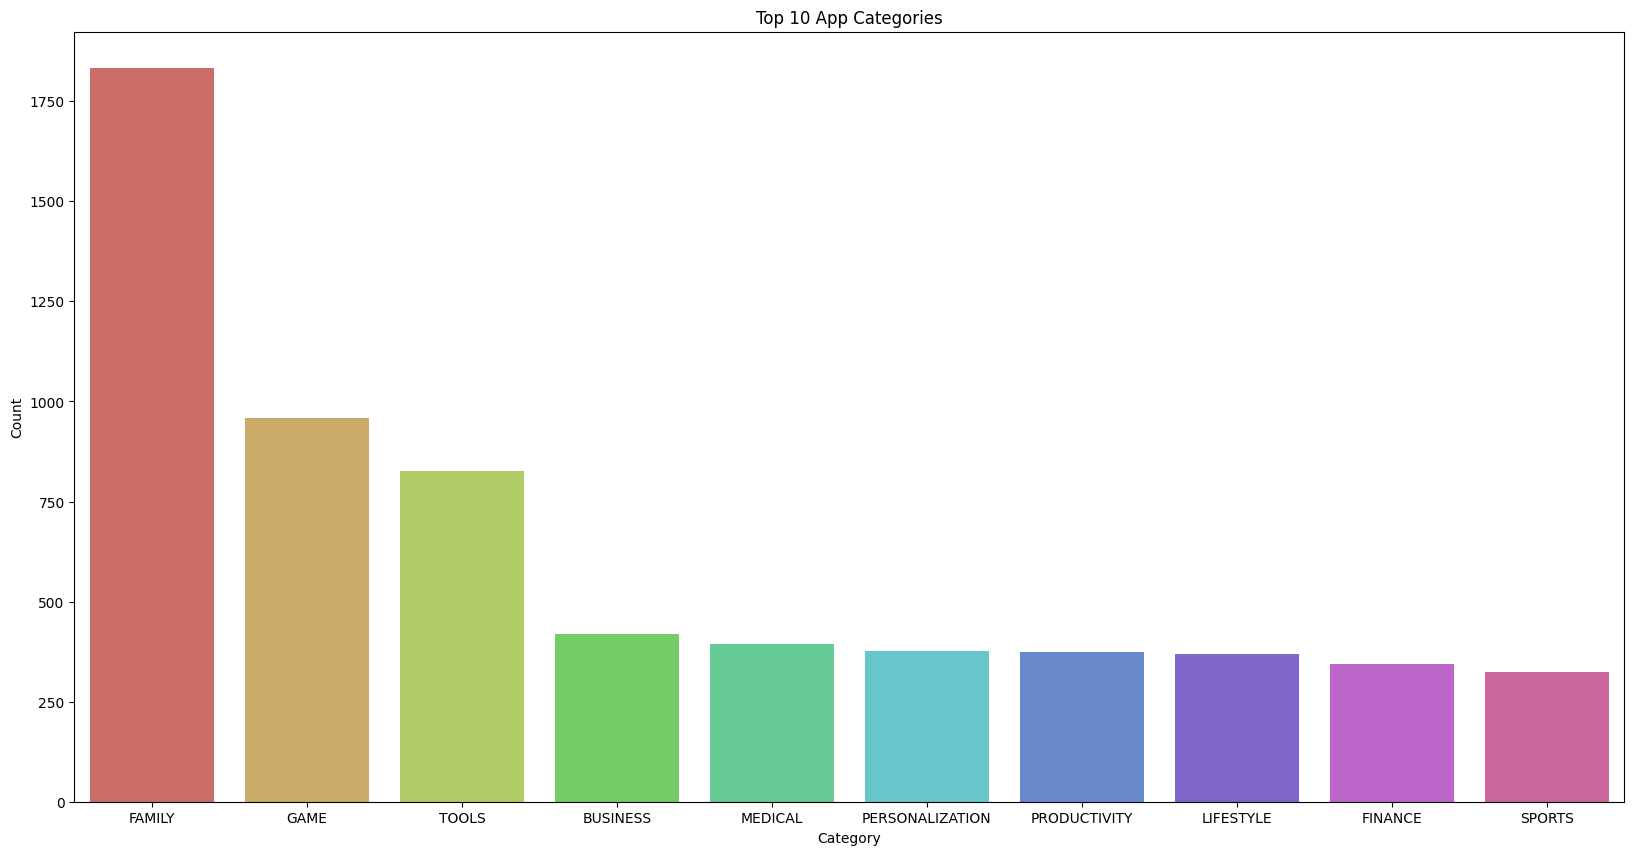

In [43]:
# barplt   
plt.figure(figsize=(20, 10))
sns.barplot(x='Category', y='Count', data=category, palette='hls')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [44]:
# Which category has the most installs?
df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001771915
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427941505
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

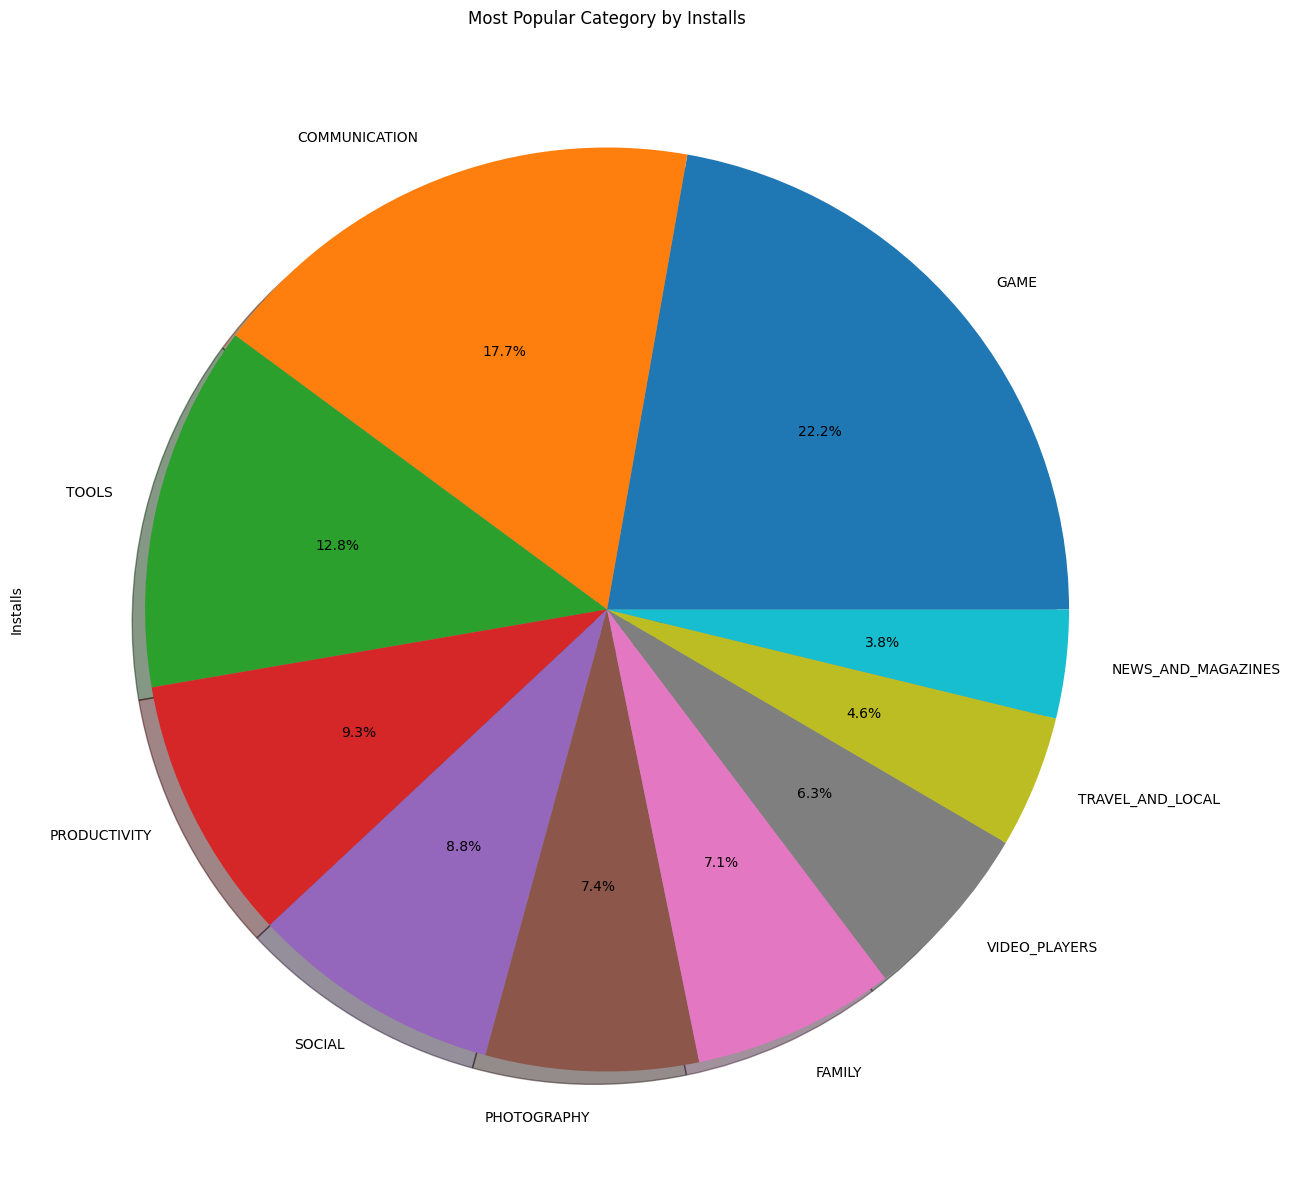

In [45]:
# Which category has the most installs?
df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot.pie(autopct='%1.1f%%', shadow=True, figsize=(15, 15))
plt.title('Most Popular Category by Installs')
plt.show()

In [46]:
'''Observation:
- The most popular category by installs is Game with 22.2% of the total installs.'''

'Observation:\n- The most popular category by installs is Game with 22.2% of the total installs.'

In [47]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [48]:
# What are the top 5 most install apps in each popular categories?
# solution - get first top 5 category by installs and then get top 5 apps for each category
df_top_5_category = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5).index
df_top_5_category


Index(['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL'], dtype='object', name='Category')

In [49]:
# now get the top 5 apps for each category

for category in df_top_5_category:
    df_top_5 = df_copy[df_copy['Category'] == category].sort_values(by='Installs', ascending=False).head(5).reset_index(drop=True)
    print(f'Top 5 apps in {category} category:')
    print(df_top_5[['App', 'Installs']])
    print('----------------------------------')


Top 5 apps in GAME category:
                App    Installs
0    Subway Surfers  1000000000
1  Candy Crush Saga   500000000
2    My Talking Tom   500000000
3               Pou   500000000
4      Temple Run 2   500000000
----------------------------------
Top 5 apps in COMMUNICATION category:
                                        App    Installs
0             Skype - free IM & video calls  1000000000
1                                     Gmail  1000000000
2                        WhatsApp Messenger  1000000000
3              Google Chrome: Fast & Secure  1000000000
4  Messenger – Text and Video Chat for Free  1000000000
----------------------------------
Top 5 apps in TOOLS category:
                                                 App    Installs
0                                             Google  1000000000
1                                   Google Translate   500000000
2                       Gboard - the Google Keyboard   500000000
3            Clean Master- Space Cleaner & An

In [50]:
top_5_apps_per_category = []

for cat in df_top_5_category:
    apps = df_copy[df_copy['Category'] == cat].sort_values(by='Installs', ascending=False).head(5)['App'].tolist()
    top_5_apps_per_category.append({'Category': cat, 'Top 5 Apps': apps})

res_df = pd.DataFrame(top_5_apps_per_category)
res_df

,Category,Top 5 Apps
0,GAME,"[Subway Surfers, Candy Crush Saga, My Talking ..."
1,COMMUNICATION,"[Skype - free IM & video calls, Gmail, WhatsAp..."
2,TOOLS,"[Google, Google Translate, Gboard - the Google..."
3,PRODUCTIVITY,"[Google Drive, Microsoft Word, Cloud Print, Dr..."
4,SOCIAL,"[Facebook, Instagram, Google+, Snapchat, Faceb..."


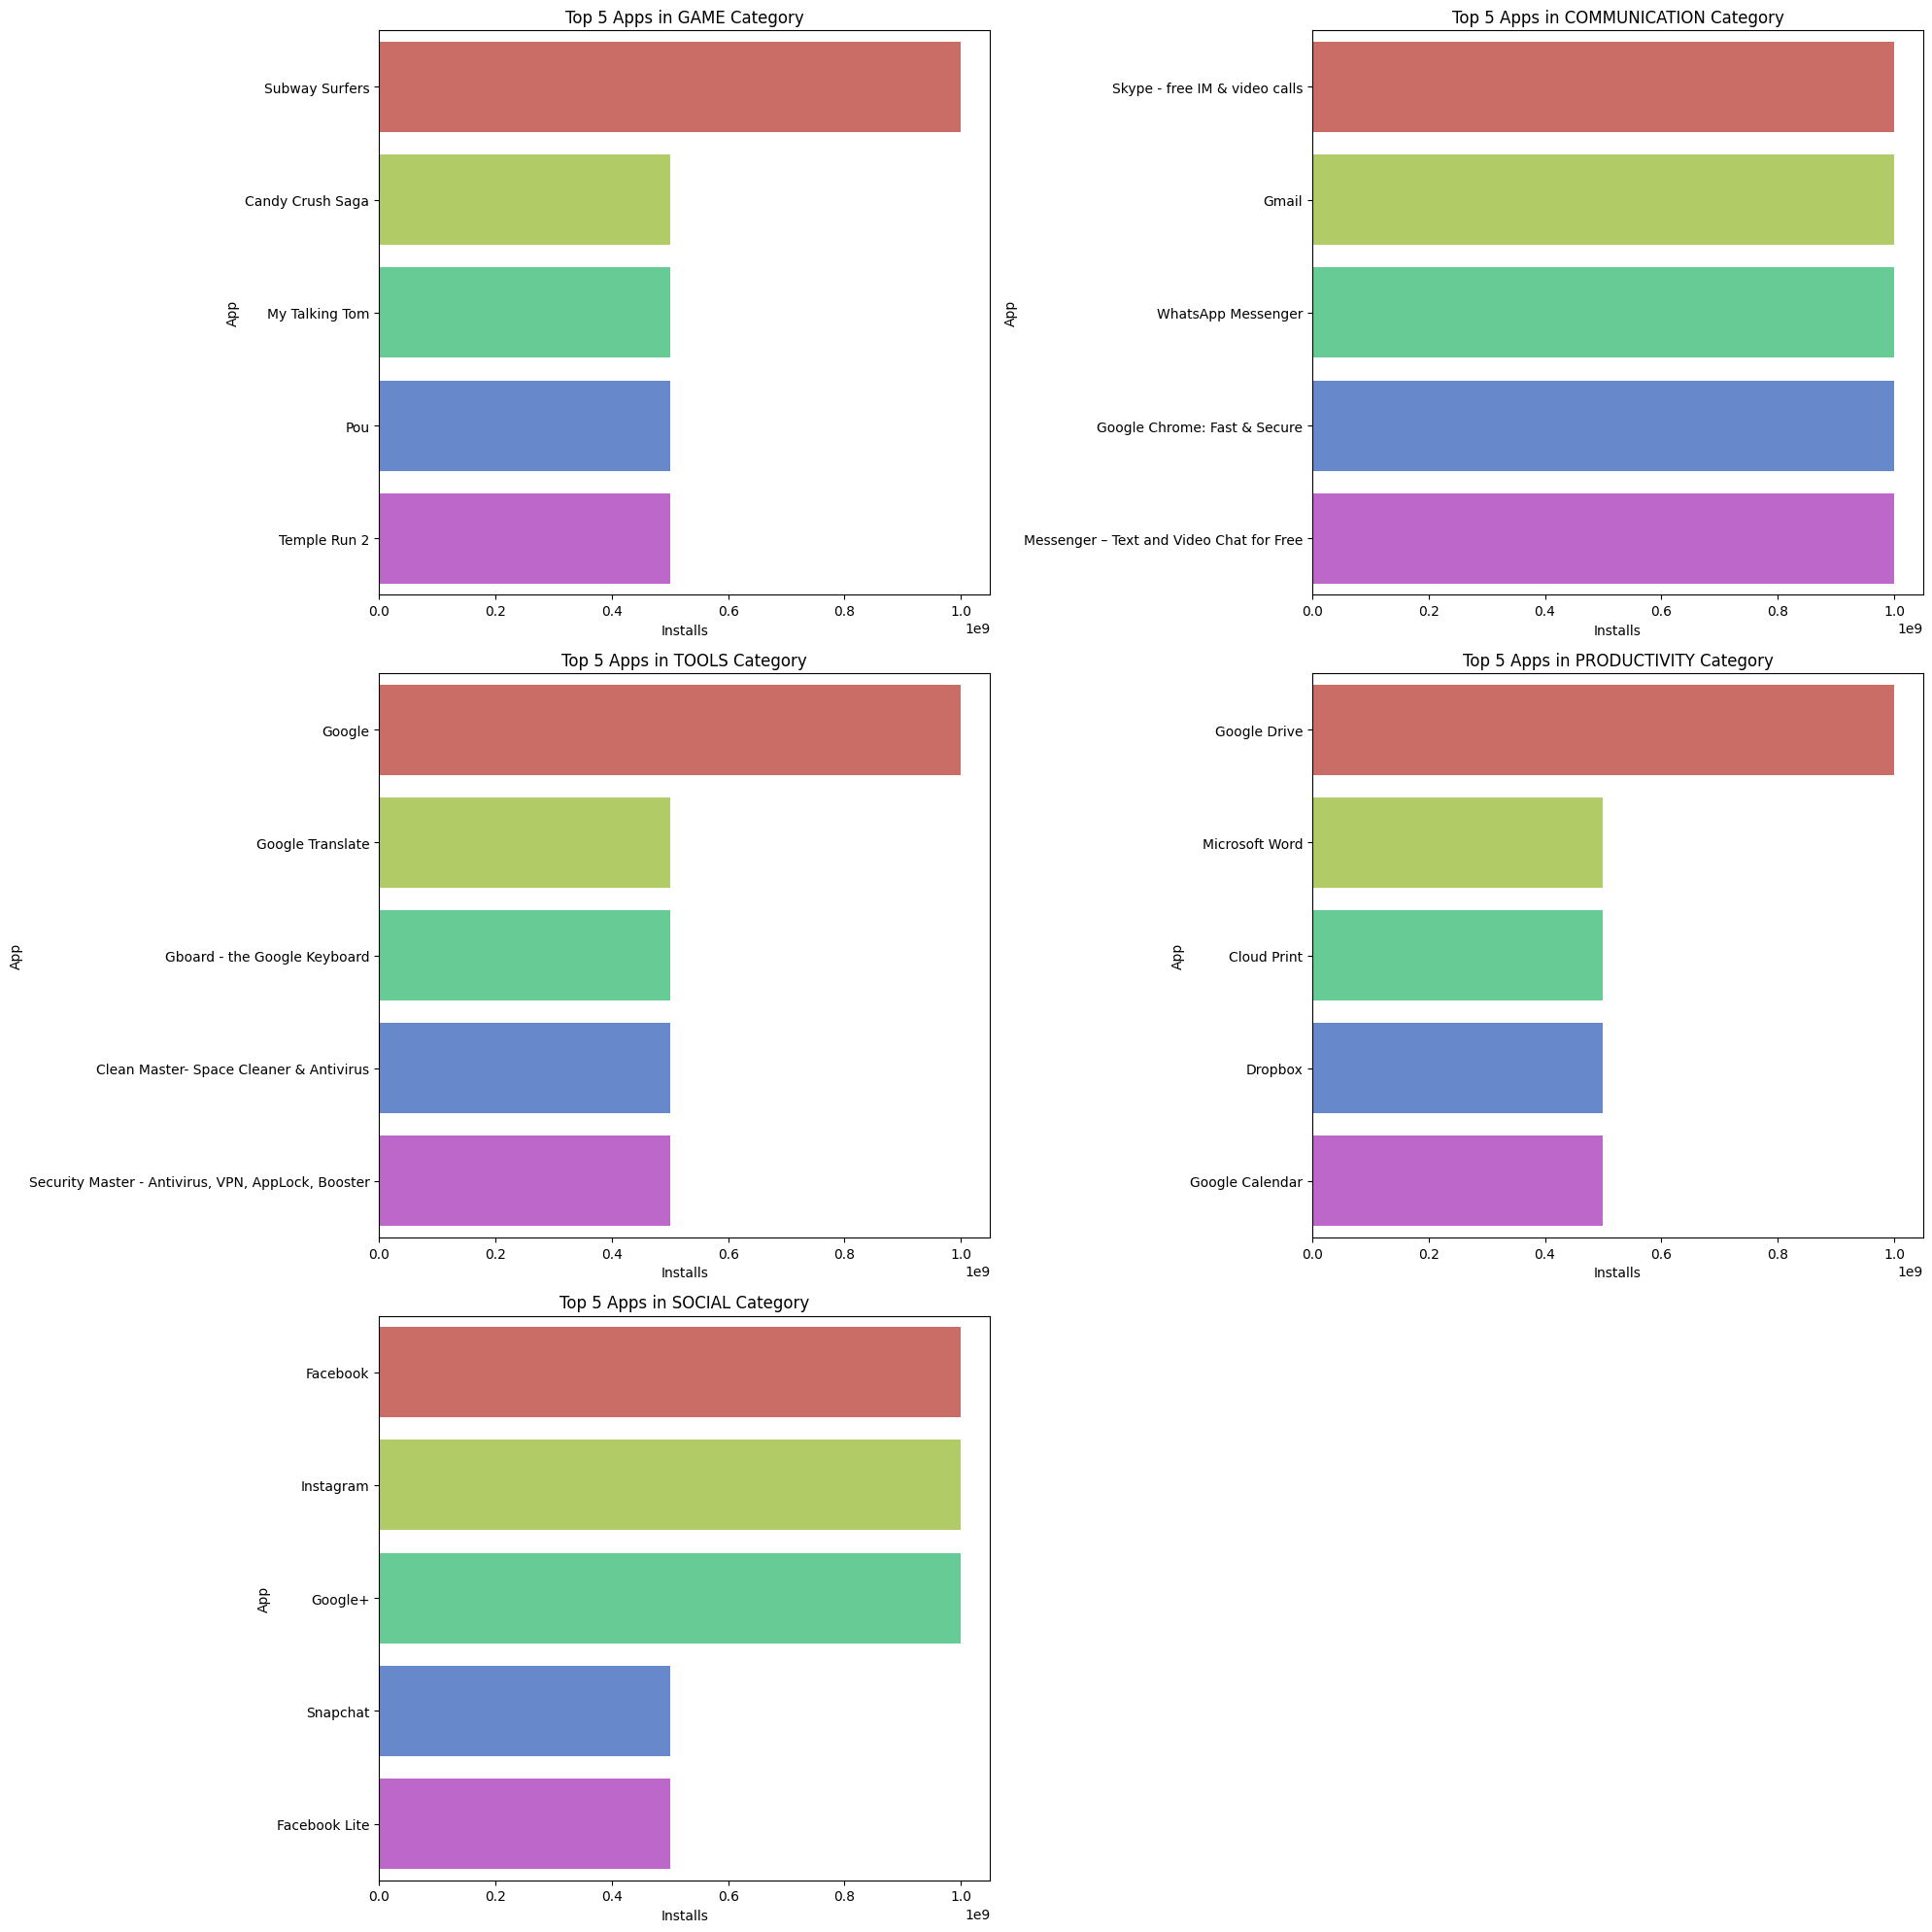

In [51]:
plt.figure(figsize=(20, 20))
for i, category in enumerate(df_top_5_category):
    df_top_5 = df_copy[df_copy['Category'] == category].sort_values(by='Installs', ascending=False).head(5)
    plt.subplot(3, 2, i+1)
    sns.barplot(x='Installs', y='App', data=df_top_5, palette='hls')
    plt.title(f'Top 5 Apps in {category} Category')
    plt.xlabel('Installs')
    plt.ylabel('App')
    plt.tight_layout()

In [52]:
# How many apps are there on Google Play Store which get 5 star rating?
df_copy[df_copy['Rating'] == 5].shape[0]
# 271 apps get 5 star rating

271

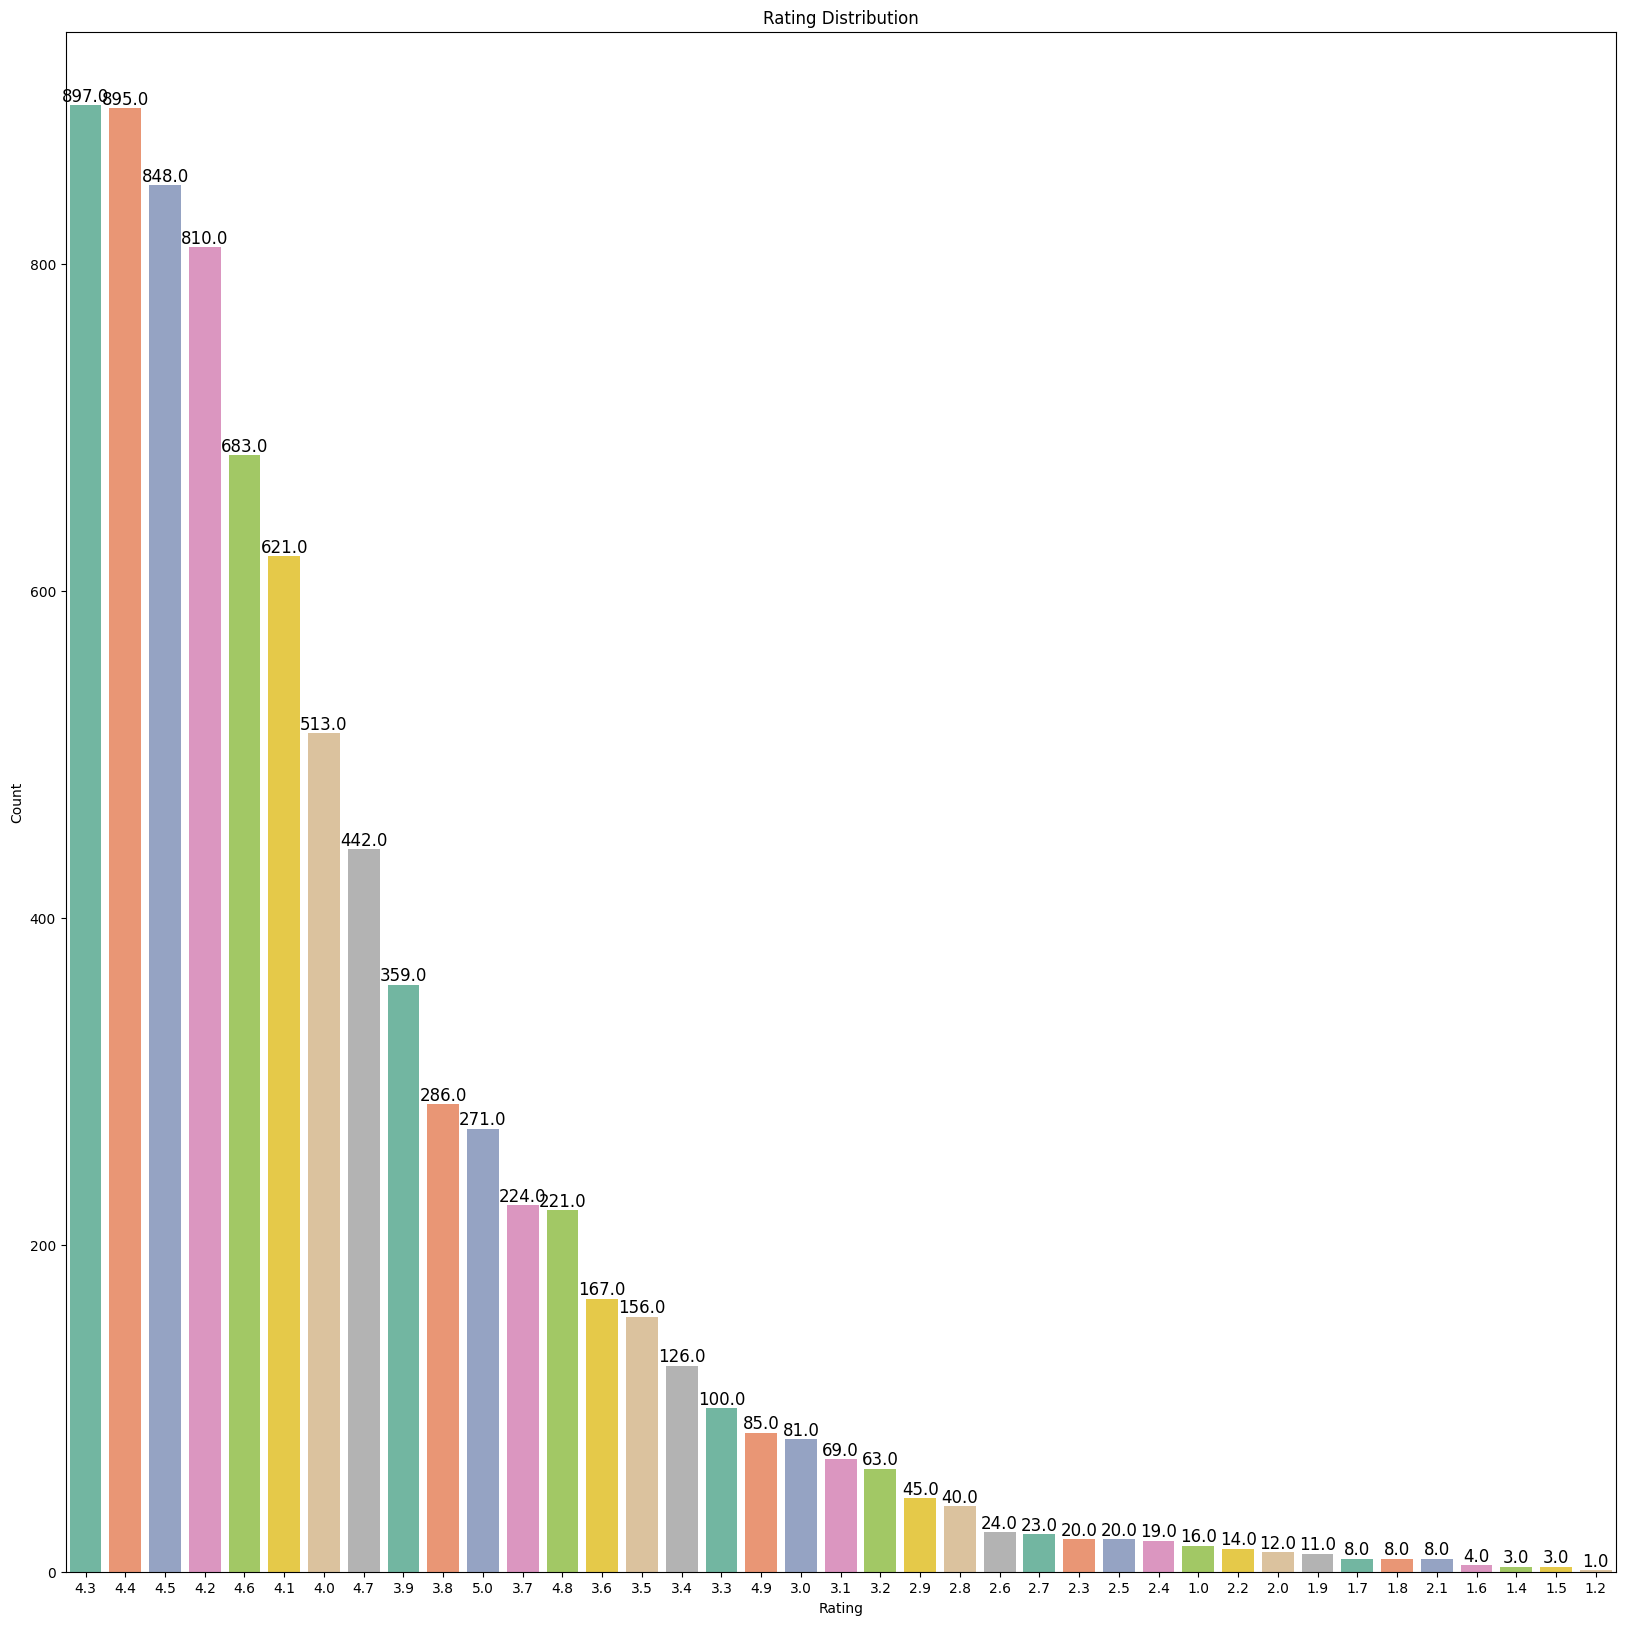

In [53]:
plt.figure(figsize=(20, 20))
ax = sns.countplot(x='Rating', palette='Set2', data=df_copy, order=df_copy['Rating'].value_counts().index)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', rotation=0)

plt.show()
